# NBA Trends

## 1. Understand Data 
-included in Readme.MD

## 2. Acquire & Inspect the Data


Step 1: Import relevant Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import scipy.stats as stats

Step 2: Read data into script

In [4]:
nba = pd.read_csv('/Users/anuroxstar/Documents/Github/nba_trends/nbaallelo.csv')

Step 3: Inspect data

In [5]:
print(nba.head())
print(nba.info())
print(nba.shape)

   gameorder       game_id lg_id  _iscopy  year_id  date_game  seasongame  \
0          1  194611010TRH   NBA        0     1947  11/1/1946           1   
1          1  194611010TRH   NBA        1     1947  11/1/1946           1   
2          2  194611020CHS   NBA        0     1947  11/2/1946           1   
3          2  194611020CHS   NBA        1     1947  11/2/1946           2   
4          3  194611020DTF   NBA        0     1947  11/2/1946           1   

   is_playoffs team_id  fran_id  ...  win_equiv  opp_id  opp_fran  opp_pts  \
0            0     TRH  Huskies  ...  40.294830     NYK    Knicks       68   
1            0     NYK   Knicks  ...  41.705170     TRH   Huskies       66   
2            0     CHS    Stags  ...  42.012257     NYK    Knicks       47   
3            0     NYK   Knicks  ...  40.692783     CHS     Stags       63   
4            0     DTF  Falcons  ...  38.864048     WSC  Capitols       50   

   opp_elo_i  opp_elo_n  game_location  game_result  forecast notes 

## 3. Data Cleaning:

Step 1: Reshape Data?
- data is tidy (tabular format)

Step 2: Remove duplicates

In [6]:
nba.drop_duplicates()
nba = nba[nba._iscopy == 0]
#Check duplicate data is removed
print(nba._iscopy.value_counts)

<bound method IndexOpsMixin.value_counts of 0         0
2         0
4         0
7         0
9         0
         ..
126305    0
126307    0
126309    0
126310    0
126312    0
Name: _iscopy, Length: 63157, dtype: int64>


Step 3: Explore the following columns.

In [7]:
print(nba.lg_id.value_counts)

print(nba.fran_id.value_counts(normalize=True))
nba = nba.rename({'fran_id':'playing_team'}, axis = 1)

print(nba.team_id.value_counts)

print(nba.win_equiv.value_counts)

print(nba.opp_fran.value_counts(normalize = True))
nba = nba.rename({'opp_fran':'opp_team'}, axis = 1)

print(nba.opp_id.value_counts)

print(nba.notes.value_counts)

print(nba.game_location.value_counts(normalize = True))


<bound method IndexOpsMixin.value_counts of 0         NBA
2         NBA
4         NBA
7         NBA
9         NBA
         ... 
126305    NBA
126307    NBA
126309    NBA
126310    NBA
126312    NBA
Name: lg_id, Length: 63157, dtype: object>
Celtics         0.049084
Lakers          0.047802
Pistons         0.045949
Knicks          0.045205
Kings           0.043606
Hawks           0.043431
Warriors        0.043051
Sixers          0.042703
Wizards         0.037462
Bulls           0.034533
Spurs           0.034248
Pacers          0.033456
Thunder         0.032791
Rockets         0.032728
Nuggets         0.032570
Nets            0.032554
Suns            0.032237
Bucks           0.031746
Trailblazers    0.030606
Cavaliers       0.030226
Clippers        0.029656
Jazz            0.028184
Mavericks       0.023798
Heat            0.018858
Pelicans        0.017797
Magic           0.017464
Timberwolves    0.016847
Grizzlies       0.013110
Raptors         0.012920
Hornets         0.007078
Colonels 

Step 4: Remove columns

In [8]:
nba.drop(['lg_id','date_game','team_id','elo_i', 'elo_n', '_iscopy', 'gameorder'], axis =1, inplace = True)
nba.drop(['win_equiv','opp_id','opp_elo_i','opp_elo_n','notes'], axis =1, inplace = True)


Step 5: Missing/ Incomplete Data?

In [9]:
print(nba.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63157 entries, 0 to 126312
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        63157 non-null  object 
 1   year_id        63157 non-null  int64  
 2   seasongame     63157 non-null  int64  
 3   is_playoffs    63157 non-null  int64  
 4   playing_team   63157 non-null  object 
 5   pts            63157 non-null  int64  
 6   opp_team       63157 non-null  object 
 7   opp_pts        63157 non-null  int64  
 8   game_location  63157 non-null  object 
 9   game_result    63157 non-null  object 
 10  forecast       63157 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 5.8+ MB
None


Step 6: Change Data Types of Columns?

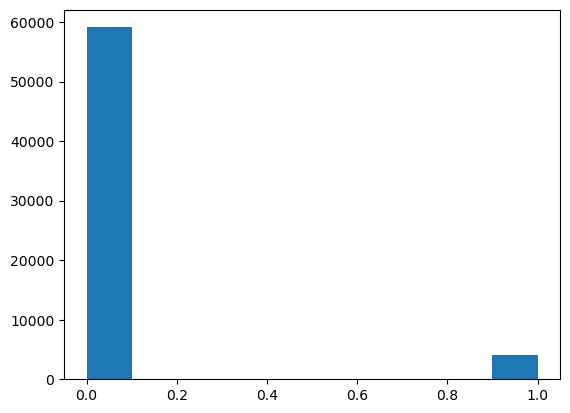

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63157 entries, 0 to 126312
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        63157 non-null  object 
 1   year_id        63157 non-null  int64  
 2   seasongame     63157 non-null  int64  
 3   is_playoffs    63157 non-null  string 
 4   playing_team   63157 non-null  object 
 5   pts            63157 non-null  int64  
 6   opp_team       63157 non-null  object 
 7   opp_pts        63157 non-null  int64  
 8   game_location  63157 non-null  object 
 9   game_result    63157 non-null  object 
 10  forecast       63157 non-null  float64
dtypes: float64(1), int64(4), object(5), string(1)
memory usage: 5.8+ MB
None


In [10]:

plt.hist(nba.is_playoffs)
plt.show()
plt.close()
nba['is_playoffs'] = nba['is_playoffs'].astype('string')

#Confirm change in data types
print(nba.info())

Step 7: Numerical Variables ONLY: Skewed Data? - through comparing mean and median

In [11]:
print(nba.describe())

            year_id    seasongame           pts       opp_pts      forecast
count  63157.000000  63157.000000  63157.000000  63157.000000  63157.000000
mean    1988.200374     43.523426    104.601723    100.858242      0.621071
std       17.582379     25.391650     14.995597     14.390547      0.177976
min     1947.000000      1.000000      2.000000      0.000000      0.062616
25%     1975.000000     22.000000     95.000000     92.000000      0.498643
50%     1990.000000     43.000000    104.000000    101.000000      0.640040
75%     2003.000000     65.000000    114.000000    110.000000      0.759441
max     2015.000000    108.000000    184.000000    186.000000      0.979553


Step 8: Numerical Variables ONLY: Outlier/Anomalous Data?

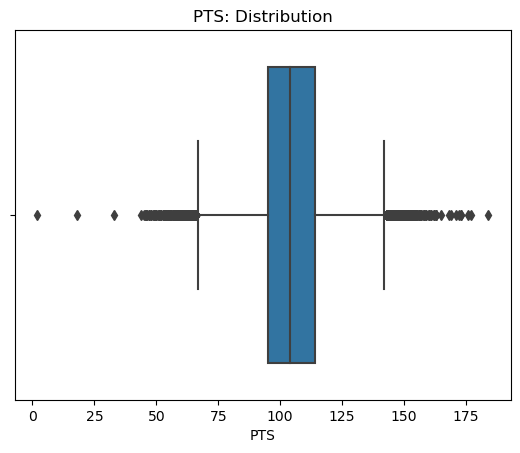

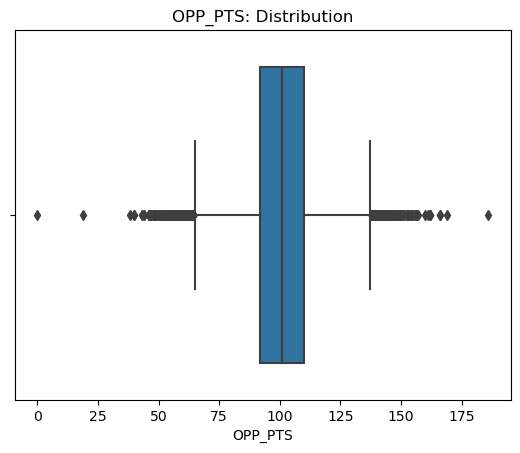

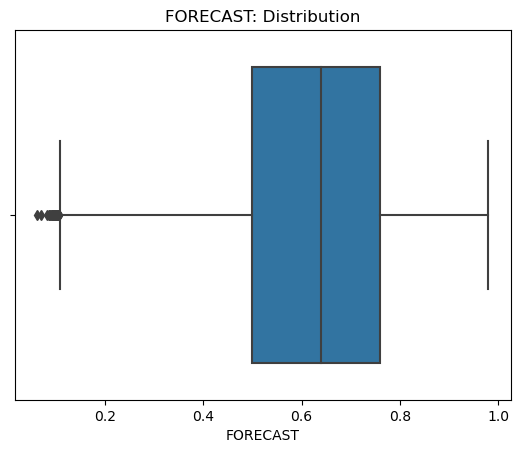

In [12]:
def boxplot(column, name):
    sns.boxplot(data = nba, x = nba[f'{column}'])
    plt.xlabel(str.upper(column))
    plt.title(str.upper(column)+": Distribution")
    plt.savefig(name)
    plt.show()
boxplot('pts', 'pts_boxplot.jpg')
boxplot('opp_pts', 'opp_pts_boxplot.jpg')
boxplot('forecast','forecast_boxplot.jpg')

## 4. Exploratory Data Analysis &  Data Visualizations:

First determine how many teams there are

In [13]:
print(nba.playing_team.nunique())

53


Question 1: Is forecast of winning linearly associated to points won? (for all 53 teams):

0.1959970800470723


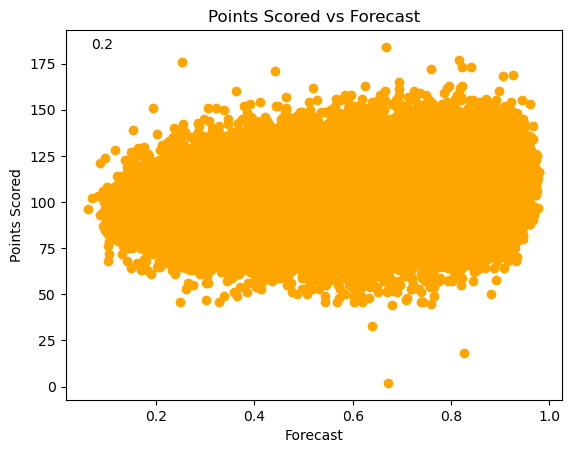

In [14]:
corr_forecast_pointdiff, p = pearsonr(nba.forecast, nba.pts)
print(corr_forecast_pointdiff)
pts_vs_forecast = plt.scatter(nba.forecast, nba.pts, color = 'orange')
plt.xlabel('Forecast')
plt.ylabel('Points Scored')
plt.annotate(str(np.round(corr_forecast_pointdiff,2)), xy=(0.05, 0.95), xycoords='axes fraction')
plt.title('Points Scored vs Forecast')
plt.savefig('points_scored_vs_forecast.jpg')
plt.show()
plt.close()


Question 2: Does game location affect points for a team?:
check there are minimum of 3 data points for each team for each game location

game_location       H    N
playing_team              
Clippers       1870.0  3.0
Nets           2053.0  3.0
(2, 2)


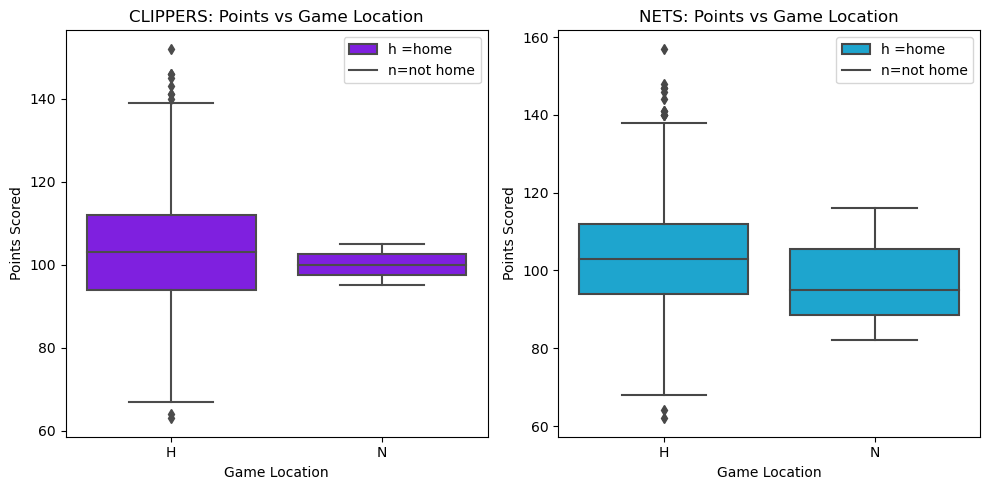

In [15]:
teams_with_two_locations = nba.groupby(['playing_team','game_location'])['game_location'].count()
teams_with_two_locations = teams_with_two_locations.to_frame(name = 'game_location_count').reset_index()
teams_with_two_locations = teams_with_two_locations.pivot(index = 'playing_team', columns = 'game_location', values = 'game_location_count')
teams_for_analysis = teams_with_two_locations[(teams_with_two_locations['H'] >=3) & (teams_with_two_locations['N'] >=3)]
print(teams_for_analysis.head())
print(teams_for_analysis.shape)

#graph for each team, with location on x axis and points on y axis
def points_vs_game_location(bballteams,name):
    i=1
    fig = plt.figure(figsize=(10,5))
    color = iter(cm.rainbow(np.linspace(0,1,5)))
    for value in bballteams.index:
        team = nba[nba.playing_team == str(value)]
        plt.subplot(1,2,i)
        c= next(color)
        sns.boxplot(x = team.game_location, y = team.pts,color=c)
        plt.xlabel('Game Location')
        plt.ylabel('Points Scored')  
        plt.title(str.upper(value) + ': Points vs Game Location')
        plt.legend(['h =home', 'n=not home'])
        i+=1
    fig.tight_layout()
    fig.savefig(name)
    plt.show()
    plt.close()
points_vs_game_location(teams_for_analysis,'points_scored_vs_location.jpg')

Question 3: Is playing team and game result associated for the top 5 and bottom 5 teams?:

In [16]:
scores = nba.groupby('playing_team').pts.mean().reset_index()
scores = scores.sort_values(by='pts', ascending = False)
top_teams = scores.head()
bottom_teams = scores.tail()
ten_teams = top_teams.append(bottom_teams)
nba_ten_teams = nba[nba['playing_team'].isin(ten_teams.playing_team.value_counts().index)]
print(nba_ten_teams.playing_team.value_counts())

gamelocationvsresult_expected = pd.crosstab(nba_ten_teams.playing_team,nba_ten_teams.game_result)
print(gamelocationvsresult_expected)
gamelocationvsresult_freq = gamelocationvsresult_expected/ len(nba_ten_teams)
print(gamelocationvsresult_freq)
chi2, locationvsresultpval, dof, locationvsresultexpected = chi2_contingency(gamelocationvsresult_freq)
print(np.round(locationvsresultexpected,2))
print(locationvsresultpval)


Colonels      431
Squires       387
Stars         381
Floridians    219
Condors       206
Bombers       124
Rebels         31
Huskies        30
Falcons        30
Ironmen        30
Name: playing_team, dtype: int64
game_result     L    W
playing_team          
Bombers        46   78
Colonels      115  316
Condors        83  123
Falcons        18   12
Floridians     87  132
Huskies        15   15
Ironmen        19   11
Rebels         13   18
Squires       165  222
Stars         116  265
game_result          L         W
playing_team                    
Bombers       0.024612  0.041734
Colonels      0.061530  0.169074
Condors       0.044409  0.065811
Falcons       0.009631  0.006421
Floridians    0.046549  0.070626
Huskies       0.008026  0.008026
Ironmen       0.010166  0.005886
Rebels        0.006956  0.009631
Squires       0.088283  0.118780
Stars         0.062065  0.141787
[[0.02 0.04]
 [0.08 0.15]
 [0.04 0.07]
 [0.01 0.01]
 [0.04 0.07]
 [0.01 0.01]
 [0.01 0.01]
 [0.01 0.01]
 [0.08 0.13

/var/folders/jl/ghr36nms4yd24n06j_2htsd00000gn/T/ipykernel_19671/2210747877.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ten_teams = top_teams.append(bottom_teams)


Question 4: Is there an association between points won and opposing points won for the top 5 teams and bottom 5 teams?: 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

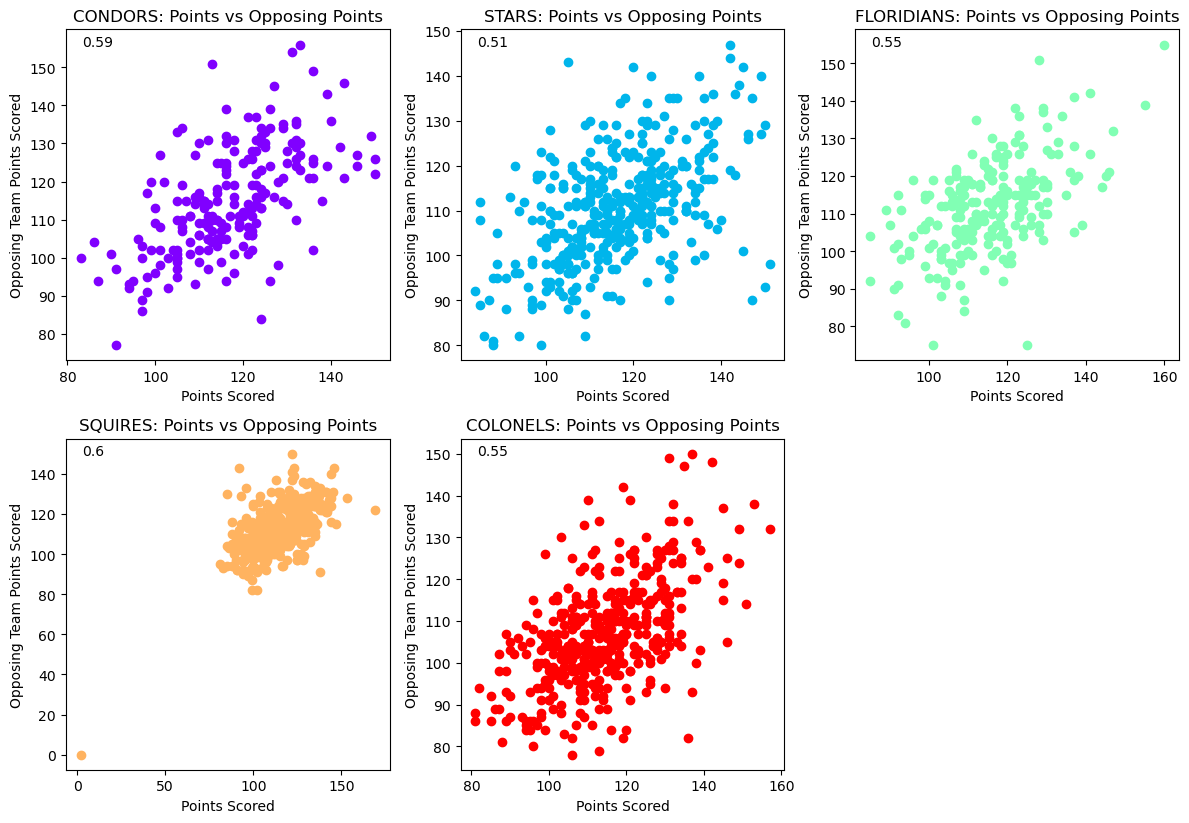

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

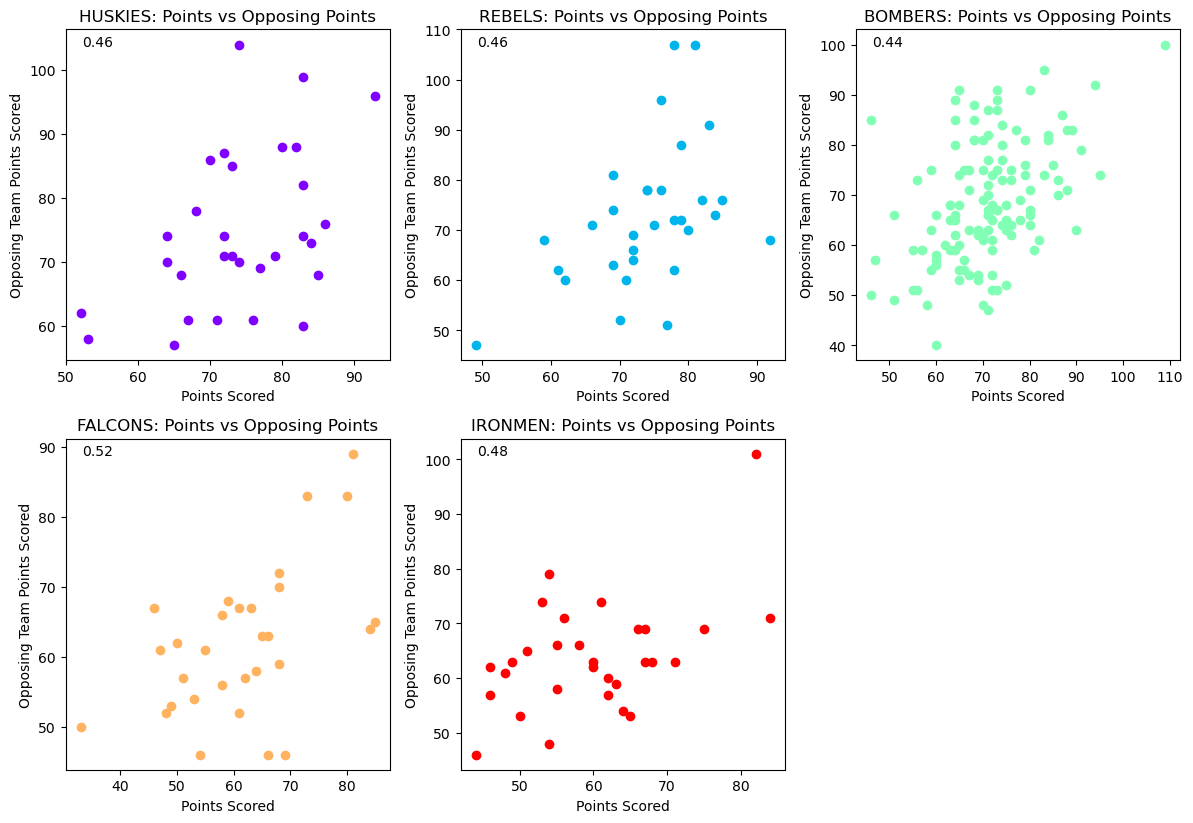

In [17]:
def scatterplot_teams(teams,name):
    color = iter(cm.rainbow(np.linspace(0, 1, 5)))
    fig = plt.figure(figsize=(12,12))
    i=1
    for value in teams.playing_team:
        team = nba[nba.playing_team == str(value)]
        plt.subplot(3,3,i)
        c= next(color)
        plt.xlabel('Points Scored')
        plt.ylabel('Opposing Team Points Scored')  
        plt.scatter(x=team.pts, y= team.opp_pts, c=c)
        corr_point_vs_opp_pts, p = pearsonr(team.pts, team.opp_pts)
        plt.annotate(str(np.round(corr_point_vs_opp_pts,2)), xy=(0.05, 0.95), xycoords='axes fraction')
        plt.title(str.upper(value) + ': Points vs Opposing Points')
        i+=1
    fig.tight_layout()
    plt.show()
    fig.savefig(name)
    plt.close()
scatterplot_teams(top_teams, 'top_teams_ptswon_vs_opposing_ptswon.jpg')
scatterplot_teams(bottom_teams, 'bottom_teams_ptswon_vs_opposing_ptswon.jpg')

Question 5: Is there an association between top 5 teams and points won?:

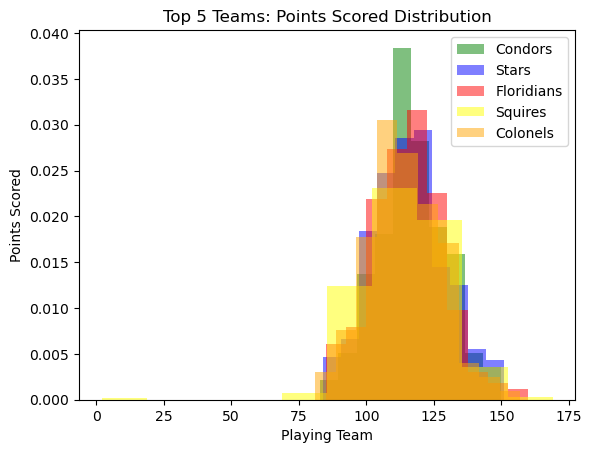

In [18]:
condors = nba.pts[nba.playing_team =='Condors']
stars = nba.pts[nba.playing_team =='Stars']
floridians = nba.pts[nba.playing_team =='Floridians']
squires = nba.pts[nba.playing_team =='Squires']
colonels = nba.pts[nba.playing_team =='Colonels']
plt.hist(condors, color = 'green' , label = 'Condors', density = True, alpha = 0.5)
plt.hist(stars, color = 'blue' , label = 'Stars', density = True, alpha = 0.5)
plt.hist(floridians, color = 'red' , label = 'Floridians', density = True, alpha = 0.5)
plt.hist(squires, color = 'yellow' , label = 'Squires', density = True, alpha = 0.5)
plt.hist(colonels, color = 'orange' , label = 'Colonels', density = True, alpha = 0.5)
plt.xlabel('Playing Team')
plt.ylabel('Points Scored')
plt.title('Top 5 Teams: Points Scored Distribution')
plt.legend()
plt.savefig('top5teams_pts_scored_hist.jpg')
plt.show()
plt.close()